### Accessing the European Central Bank DWH risk data with Python

The European Central Bank (ECB) and the European Banking Authority (EBA) have made a large amount of credit risk information available. Although much of this information is not yet in a machine-readable format, the [ECB DWH](https://sdw-wsrest.ecb.europa.eu/help/) is starting to change this situation.


In [252]:
import requests
import pandas as pd
import io
import matplotlib.pyplot as plt

In [253]:
# Query the ECB DWH for risk data
def sup_ecb_data(countries, data_items):
  country_list = "+".join(countries)
  item_list = "+".join(data_items)

  entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/'
  resource = 'data'
  flowRef ='SUP'
  key = f'Q.B01.{country_list}._Z.{item_list}._T._Z._Z._Z._Z.PCT.C'

  # Define the parameters
  params = {
      'startPeriod': '2000-01-01',  # Start date of the time series
      'endPeriod': '2022-10-01'     # End of the time series
  }

  # Create the query
  request_url = entrypoint + resource + '/'+ flowRef + '/' + key

  # Make the HTTP request
  return requests.get(request_url, params=params, headers={'Accept': 'text/csv'})

In [254]:
# Parametrisation
countries = ['ES', 'DE', 'FR', 'IT', 'EE', 'SE', 
             'IT', 'NL', 'CH', 'FI', 'BE']
data_items = ['EPD05', 'EL005']

# Request
response = sup_ecb_data(countries, data_items)

In [255]:
# Read the response as a file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

df[['TIME_PERIOD', 'TITLE', 'TITLE_COMPL', 'COUNT_AREA', 'OBS_VALUE']].head()

,TIME_PERIOD,TITLE,TITLE_COMPL,COUNT_AREA,OBS_VALUE
0,2018-Q3,Loss given default,Exposure weighted average lgd (%) - retail - s...,BE,13.29
1,2018-Q4,Loss given default,Exposure weighted average lgd (%) - retail - s...,BE,13.62
2,2019-Q1,Loss given default,Exposure weighted average lgd (%) - retail - s...,BE,13.60
3,2019-Q2,Loss given default,Exposure weighted average lgd (%) - retail - s...,BE,13.51
4,2019-Q3,Loss given default,Exposure weighted average lgd (%) - retail - s...,BE,13.69


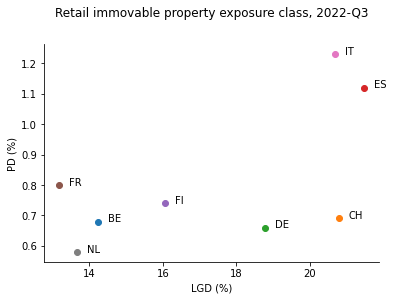

In [256]:
# Display the LGD and PD combinations for different countries

# Filter dataframe by date and create the dataset for plotting
given_date = '2022-Q3'
df21 = df[df['TIME_PERIOD'] == given_date]

df2 = df21.pivot_table(index='COUNT_AREA', columns='TITLE', values='OBS_VALUE').reset_index()

# create the scatter plot and add group names next to the datapoints
for group, name in df2.groupby('COUNT_AREA'):
    plt.scatter(name['Loss given default'], name['Probability of default'], label=group)

for i, txt in enumerate(df2['COUNT_AREA']):
    plt.annotate(txt, 
                 (df2['Loss given default'][i], 
                  df2['Probability of default'][i]), 
                 xytext=(10,0), 
                 textcoords='offset points')

# Add info and show the plot
plt.xlabel('LGD (%)')
plt.ylabel('PD (%)')
plt.title(f'Retail immovable property exposure class, {given_date}', y =1.1)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()